In [72]:
import src.util as utils
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from matplotlib import pyplot

## Load Configuration File

In [4]:
config = utils.load_config()

## Load Train and Valid Set 

In [5]:
def load_train_feng(params: dict):
    # Load train set
    x_train = utils.pickle_load(params["train_feng_set_path"][0])
    y_train = utils.pickle_load(params["train_feng_set_path"][1])

    return x_train, y_train

def load_valid(params: dict):
    # Load valid set
    x_valid = utils.pickle_load(params["valid_feng_set_path"][0])
    y_valid = utils.pickle_load(params["valid_feng_set_path"][1])

    return x_valid, y_valid

def load_test(params: dict):
    # Load tets set
    x_test = utils.pickle_load(params["test_feng_set_path"][0])
    y_test = utils.pickle_load(params["test_feng_set_path"][1])

    return x_test, y_test

In [6]:
x_train, y_train = load_train_feng(config)
x_valid, y_valid = load_valid(config)
x_test, y_test = load_test(config)

## Hyperparameter Tuning

In [12]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [54]:
def objective(space):
    
    model = XGBClassifier(
        n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
        colsample_bytree=int(space['colsample_bytree'])
    )

    evaluation = [( x_train, y_train), (x_valid, y_valid)]
    
    model.fit(x_train, y_train,
            eval_set=evaluation,
            early_stopping_rounds=10,verbose=False)

    y_pred = model.predict(x_test)
    score = roc_auc_score(y_test, y_pred)
    print("SCore:", score)
    loss = 1 - score
    return {'loss': loss, 'status': STATUS_OK, 'model': model}

In [55]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCore:                                                 
0.7802829993802933                                     
  1%|          | 1/100 [00:00<00:11,  8.71trial/s, best loss: 0.21971700061970667]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                            
0.7906424292501548                                                                
SCore:                                                                            
0.7864800661020451                                                                
  3%|▎         | 3/100 [00:00<00:12,  7.66trial/s, best loss: 0.20935757074984518]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                            
0.7879363767816567                                                                
SCore:                                                                            
0.7817393100599049                                                                
  5%|▌         | 5/100 [00:00<00:11,  8.06trial/s, best loss: 0.20935757074984518]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                            
0.7885147696756869                                                                
SCore:                                                                            
0.7832885767403428                                                                
SCore:                                                                            
  7%|▋         | 7/100 [00:00<00:10,  9.13trial/s, best loss: 0.20935757074984518]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.7875438958892792                                                                
SCore:                                                                            
0.7901569923569511                                                                
  8%|▊         | 8/100 [00:00<00:09,  9.33trial/s, best loss: 0.20935757074984518]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                            
0.7891861185705433                                                                
SCore:                                                                             
0.782803139847139                                                                  
 11%|█         | 11/100 [00:01<00:09,  9.79trial/s, best loss: 0.20935757074984518]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7849307994216072                                                                 
SCore:                                                                             
0.7957550092956                                                                    
 13%|█▎        | 13/100 [00:01<00:09,  9.08trial/s, best loss: 0.20424499070440005]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7905494732493287                                                                 
SCore:                                                                             
0.7764201611237349                                                                 
 15%|█▌        | 15/100 [00:01<00:09,  9.40trial/s, best loss: 0.20424499070440005]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7864800661020451                                                                 
SCore:                                                                             
0.7803036562693658                                                                 
 17%|█▋        | 17/100 [00:01<00:09,  8.72trial/s, best loss: 0.20424499070440005]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7891861185705433                                                                 
SCore:                                                                             
0.7785478206982029                                                                 
 19%|█▉        | 19/100 [00:02<00:09,  8.63trial/s, best loss: 0.20424499070440005]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.788401156785788                                                                  
SCore:                                                                             
0.7886077256765132                                                                 
 21%|██        | 21/100 [00:02<00:09,  8.64trial/s, best loss: 0.20424499070440005]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7902499483577774                                                                 
SCore:                                                                             
0.7952695724023963                                                                 
 23%|██▎       | 23/100 [00:02<00:08,  8.64trial/s, best loss: 0.20424499070440005]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7926564759347242                                                                 
SCore:                                                                             
0.788029332782483                                                                  
 25%|██▌       | 25/100 [00:02<00:10,  7.20trial/s, best loss: 0.20424499070440005]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7942057426151622                                                                 
SCore:                                                                             
0.7915926461474903                                                                 
 27%|██▋       | 27/100 [00:03<00:08,  8.25trial/s, best loss: 0.20424499070440005]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7853232803139847                                                                 
SCore:                                                                             
0.7887006816773394                                                                 
 29%|██▉       | 29/100 [00:03<00:08,  8.53trial/s, best loss: 0.20424499070440005]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7868725469944227                                                                 
SCore:                                                                             
0.7800970873786407                                                                 
 31%|███       | 31/100 [00:03<00:08,  8.00trial/s, best loss: 0.20424499070440005]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7910142532534601                                                                 
SCore:                                                                             
0.7853232803139847                                                                 
 33%|███▎      | 33/100 [00:03<00:09,  7.44trial/s, best loss: 0.20424499070440005]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7982751497624457                                                                 
SCore:                                                                             
0.7902499483577774                                                                 
 35%|███▌      | 35/100 [00:04<00:08,  7.48trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7962404461888039                                                                 
SCore:                                                                             
0.788029332782483                                                                  
 37%|███▋      | 37/100 [00:04<00:08,  7.44trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7879363767816567                                                                 
SCore:                                                                             
0.7874509398884528                                                                 
 39%|███▉      | 39/100 [00:04<00:07,  8.14trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7957550092956                                                                    
SCore:                                                                             
0.7912208221441851                                                                 
 41%|████      | 41/100 [00:04<00:06,  8.88trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7869655029952489                                                                 
SCore:                                                                             
0.779126213592233                                                                  
 43%|████▎     | 43/100 [00:05<00:07,  8.07trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7796116504854369                                                                 
SCore:                                                                             
0.7790332575914067                                                                 
 45%|████▌     | 45/100 [00:05<00:07,  7.39trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7886077256765132                                                                 
SCore:                                                                             
0.7838669696343731                                                                 
 47%|████▋     | 47/100 [00:05<00:06,  8.12trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7944123115058872                                                                 
SCore:                                                                             
0.7864800661020451                                                                 
 49%|████▉     | 49/100 [00:05<00:06,  8.21trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7869655029952489                                                                 
SCore:                                                                             
0.7764201611237349                                                                 
 51%|█████     | 51/100 [00:06<00:06,  8.06trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7870584589960753                                                                 
SCore:                                                                             
0.7925635199338981                                                                 
 53%|█████▎    | 53/100 [00:06<00:05,  8.85trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7886077256765132                                                                 
SCore:                                                                             
0.7922846519314192                                                                 
 55%|█████▌    | 55/100 [00:06<00:05,  7.86trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7853232803139847                                                                 
SCore:                                                                             
0.788029332782483                                                                  
 57%|█████▋    | 57/100 [00:06<00:05,  7.93trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7838669696343731                                                                 
SCore:                                                                             
0.7901569923569511                                                                 
 59%|█████▉    | 59/100 [00:07<00:04,  8.48trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7832885767403428                                                                 
SCore:                                                                             
0.7859946292088413                                                                 
 61%|██████    | 61/100 [00:07<00:04,  8.60trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7859946292088413                                                                 
SCore:                                                                             
0.7881222887833093                                                                 
 63%|██████▎   | 63/100 [00:07<00:04,  8.71trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7806754802726711                                                                 
SCore:                                                                             
0.7902499483577774                                                                 
 65%|██████▌   | 65/100 [00:07<00:04,  7.68trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7912208221441851                                                                 
SCore:                                                                             
0.7957550092956                                                                    
 67%|██████▋   | 67/100 [00:08<00:03,  8.28trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7962404461888039                                                                 
SCore:                                                                             
0.7962404461888039                                                                 
 69%|██████▉   | 69/100 [00:08<00:03,  8.94trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7922846519314192                                                                 
SCore:                                                                             
0.7886077256765132                                                                 
 71%|███████   | 71/100 [00:08<00:03,  8.74trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7879363767816567                                                                 
SCore:                                                                             
0.7957550092956                                                                    
 73%|███████▎  | 73/100 [00:08<00:03,  8.89trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.788029332782483                                                                  
SCore:                                                                             
0.7886077256765132                                                                 
 75%|███████▌  | 75/100 [00:08<00:02,  8.88trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7890931625697171                                                                 
SCore:                                                                             
0.7902499483577774                                                                 
 77%|███████▋  | 77/100 [00:09<00:02,  7.96trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7838669696343731                                                                 
SCore:                                                                             
0.7912208221441851                                                                 
 79%|███████▉  | 79/100 [00:09<00:02,  7.86trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7895785994629207                                                                 
SCore:                                                                             
0.7886077256765132                                                                 
 81%|████████  | 81/100 [00:09<00:02,  7.91trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7957550092956                                                                    
SCore:                                                                             
0.7849307994216072                                                                 
 83%|████████▎ | 83/100 [00:10<00:02,  6.89trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7902499483577774                                                                 
SCore:                                                                             
0.788029332782483                                                                  
 85%|████████▌ | 85/100 [00:10<00:02,  6.93trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7870584589960753                                                                 
SCore:                                                                             
0.7901569923569511                                                                 
 87%|████████▋ | 87/100 [00:10<00:01,  7.69trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7796116504854369                                                                 
SCore:                                                                             
0.7926564759347242                                                                 
 89%|████████▉ | 89/100 [00:10<00:01,  7.81trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7912208221441851                                                                 
SCore:                                                                             
0.7868725469944227                                                                 
 91%|█████████ | 91/100 [00:11<00:01,  6.97trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7864800661020451                                                                 
SCore:                                                                             
0.7881222887833093                                                                 
 93%|█████████▎| 93/100 [00:11<00:00,  7.74trial/s, best loss: 0.20172485023755427]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7790332575914067                                                                 
SCore:                                                                             
0.7993389795496799                                                                 
 95%|█████████▌| 95/100 [00:11<00:00,  8.06trial/s, best loss: 0.20066102045032008]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7910142532534601                                                                 
SCore:                                                                             
0.7907353852509811                                                                 
 97%|█████████▋| 97/100 [00:11<00:00,  8.39trial/s, best loss: 0.20066102045032008]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7944123115058872                                                                 
SCore:                                                                             
0.7944123115058872                                                                 
 99%|█████████▉| 99/100 [00:12<00:00,  8.66trial/s, best loss: 0.20066102045032008]

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

d:\Belajar\Pacmann\Final project\CAR_INSURANCE_PREDICTION\.env\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCore:                                                                             
0.7881222887833093                                                                 
100%|██████████| 100/100 [00:12<00:00,  8.19trial/s, best loss: 0.20066102045032008]


In [56]:
print(best_hyperparams)

{'colsample_bytree': 0.9215312945790399, 'gamma': 8.579361690309746, 'max_depth': 9.0, 'min_child_weight': 10.0, 'reg_alpha': 100.0, 'reg_lambda': 0.553734864557859}


## Training Model

In [83]:
def train_model(x_train, y_train, x_valid, y_valid):
    eval_set = [(x_train, y_train), (x_valid, y_valid)]
    model = XGBClassifier(colsample_bytree=0.9215312945790399, gamma=8.579361690309746, max_depth=9, min_child_weight=10.0, 
                          reg_alpha=100.0, reg_lambda=0.553734864557859)
    model.fit(x_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
    return model

In [84]:
model = train_model(x_train, y_train, x_valid, y_valid)

[0]	validation_0-error:0.16164	validation_0-logloss:0.57673	validation_1-error:0.21400	validation_1-logloss:0.60194
[1]	validation_0-error:0.16143	validation_0-logloss:0.51012	validation_1-error:0.21467	validation_1-logloss:0.54850
[2]	validation_0-error:0.16154	validation_0-logloss:0.46715	validation_1-error:0.21400	validation_1-logloss:0.52014
[3]	validation_0-error:0.15789	validation_0-logloss:0.43636	validation_1-error:0.21067	validation_1-logloss:0.50126
[4]	validation_0-error:0.15446	validation_0-logloss:0.41732	validation_1-error:0.21200	validation_1-logloss:0.49157
[5]	validation_0-error:0.15249	validation_0-logloss:0.40240	validation_1-error:0.21200	validation_1-logloss:0.47899
[6]	validation_0-error:0.15061	validation_0-logloss:0.39093	validation_1-error:0.20667	validation_1-logloss:0.47175
[7]	validation_0-error:0.15051	validation_0-logloss:0.38232	validation_1-error:0.20667	validation_1-logloss:0.46335
[8]	validation_0-error:0.14156	validation_0-logloss:0.37250	validation_1

## Evaluation and Metrics

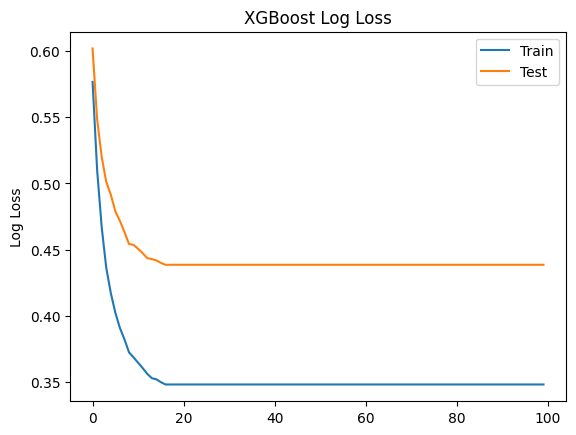

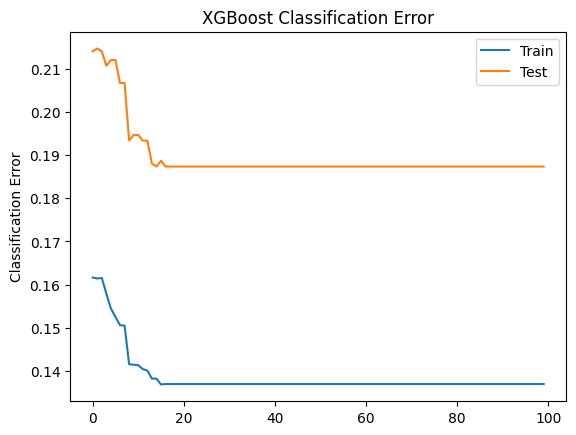

In [85]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [79]:
y_pred = model.predict(x_test)
roc_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc)

[[886 144]
 [113 357]]
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87      1030
         1.0       0.71      0.76      0.74       470

    accuracy                           0.83      1500
   macro avg       0.80      0.81      0.80      1500
weighted avg       0.83      0.83      0.83      1500

0.809884321421194


In [64]:
utils.pickle_dump(model, config["production_model_path"])